**PART-A**

**DOMAIN-ENTERTAINMENT**

**CONTEXT - Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis.Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movieand clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision and multimedia experts who need to detect faces from screen shots from the movie scene.**

**Part A - Q1 A - Import and read ‘images.npy’.**

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Defining the path to the .npy file
file_path = '/content/drive/My Drive/AI_ML/9. Computer Vision/Project/Images.npy'

In [ ]:
# Loading the .npy file
import numpy as np
images = np.load(file_path, allow_pickle=True)

In [ ]:
# Checking the shape of the loaded data
print(f"Loaded images data shape: {images.shape}")

Loaded images data shape: (393, 2)


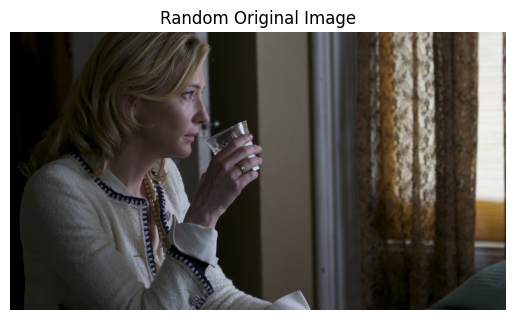

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Select a random index
random_index = random.randint(0, len(images) - 1)

# Get the random image
random_image = images[random_index][0]  # The image at the selected random index

# Display the random image
plt.imshow(random_image)
plt.title("Random Original Image")
plt.axis('off')
plt.show()


**Analysis - The dataset consists of 393 entries, each represented as a pair of elements. Specifically, the shape of the loaded data is (393, 2). This suggests that each entry is composed of two components, which are likely an image and its corresponding mask. The images are likely represented as arrays, with each corresponding mask array providing the segmentation or region of interest where a face is detected within the image. This dataset will be used to train and evaluate the face detection system that will automate the cast and crew information in movie scenes for the streaming application.**

**Part A - Q1 B - Split the data into Features(X) & labels(Y). Unify shape of all the images.**

In [ ]:
# Inspecting the structure of the data
for i in range(len(images)):
    images[i] = [np.array(images[i][0]), np.array(images[i][1])]

# Inspecting the structure
print(f"data[0]: {images[0]}")
print(f"data[0][0] (image) shape: {images[0][0].shape}")
print(f"data[0][1] (mask) shape: {images[0][1].shape}")

data[0]: [array([[[42, 37, 34],
         [56, 51, 48],
         [71, 66, 63],
         ...,
         [23, 33, 34],
         [26, 36, 37],
         [28, 38, 39]],

        [[40, 35, 32],
         [51, 46, 43],
         [64, 59, 56],
         ...,
         [27, 36, 35],
         [24, 33, 32],
         [26, 35, 34]],

        [[43, 38, 35],
         [51, 46, 43],
         [61, 56, 53],
         ...,
         [28, 30, 27],
         [33, 35, 32],
         [35, 37, 34]],

        ...,

        [[56, 47, 40],
         [57, 48, 41],
         [61, 52, 45],
         ...,
         [67, 48, 42],
         [55, 35, 28],
         [60, 40, 33]],

        [[53, 44, 37],
         [54, 45, 38],
         [57, 48, 41],
         ...,
         [59, 40, 34],
         [60, 40, 33],
         [54, 34, 27]],

        [[53, 44, 37],
         [54, 45, 38],
         [57, 48, 41],
         ...,
         [59, 40, 34],
         [70, 50, 43],
         [64, 44, 37]]], dtype=uint8)
 array([{'label': ['Face'], 'notes': '',

In [ ]:
import numpy as np
import cv2

# Splitting the data into Features (X) and Labels (Y)
X = []
Y = []

for img, mask_info in images:
    X.append(img.copy())  # Use a copy of the original image to preserve it

    # Initialize an empty mask with the same height and width as the image
    mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

    # Iterate over each face annotation in the mask_info
    for annotation in mask_info:
        points = annotation['points']

        # Convert relative coordinates to absolute pixel positions
        x1 = int(points[0]['x'] * annotation['imageWidth'])
        y1 = int(points[0]['y'] * annotation['imageHeight'])
        x2 = int(points[1]['x'] * annotation['imageWidth'])
        y2 = int(points[1]['y'] * annotation['imageHeight'])

        # Set the corresponding region in the mask to 1
        mask[y1:y2, x1:x2] = 1

    Y.append(mask)

# Unify the shape of all images (fixing target size of 128x128)
target_size = (128, 128)

X_resized = []
Y_resized = []

for img, mask in zip(X, Y):
    # Resize the image and the mask
    img_resized = cv2.resize(img, target_size)
    mask_resized = cv2.resize(mask, target_size)

    # Ensuring the mask is binary (0 or 1)
    mask_resized = (mask_resized > 0).astype(np.uint8)

    # Handle different numbers of channels
    if len(img_resized.shape) == 2:  # Grayscale image (2D array)
        img_resized = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2RGB)
    elif img_resized.shape[2] == 4:  # RGBA image
        img_resized = cv2.cvtColor(img_resized, cv2.COLOR_RGBA2RGB)
    elif img_resized.shape[2] == 3:  # RGB image
        pass
    else:
        print(f"Unexpected number of channels in image with shape {img_resized.shape}")

    # Now store the original image
    X_resized.append(img_resized)
    Y_resized.append(mask_resized)

# Convert the lists to numpy arrays
X_resized = np.array(X_resized)
Y_resized = np.array(Y_resized)

# Final shape inspection
print(f"Final X_resized shape: {X_resized.shape}")
print(f"Final Y_resized shape: {Y_resized.shape}")

Final X_resized shape: (393, 128, 128, 3)
Final Y_resized shape: (393, 128, 128)


*   Successfully loaded, resized, and processed the dataset of images and masks.
*   The images (X_resized) were resized to a uniform shape of (128, 128, 3) across 393 samples, ensuring that all images are in RGB format.
*   The masks (Y_resized) were resized to a uniform shape of (128, 128) across the same 393 samples, with binary values indicating the presence of a face.








**Part A - Q1 C - Split the data into train and test.**

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split

# Use a 70/30 split for train/test
X_train, X_test, Y_train, Y_test = train_test_split(X_resized, Y_resized, test_size=0.3, random_state=42)

# Verify the shapes of the split data
print(f"Training data shape: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Testing data shape: X_test: {X_test.shape}, Y_test: {Y_test.shape}")


Training data shape: X_train: (275, 128, 128, 3), Y_train: (275, 128, 128)
Testing data shape: X_test: (118, 128, 128, 3), Y_test: (118, 128, 128)


### Summary:

The dataset was successfully split into training and testing sets based on a 70/30 ratio. Here’s a brief summary of the split:

- **Total Dataset**:
  - The dataset originally contained 393 samples, each with images (`X_resized`) and corresponding masks (`Y_resized`).

- **Training Set**:
  - **Shape of `X_train`**: `(275, 128, 128, 3)`
    - This indicates that 275 images, each of size `128x128` pixels with 3 color channels (RGB), were allocated for training.
  - **Shape of `Y_train`**: `(275, 128, 128)`
    - Corresponding to the 275 images, the training masks are also of size `128x128` pixels, indicating the regions where faces are detected.

- **Testing Set**:
  - **Shape of `X_test`**: `(118, 128, 128, 3)`
    - 118 images, each of size `128x128` pixels with 3 color channels (RGB), were allocated for testing.
  - **Shape of `Y_test`**: `(118, 128, 128)`
    - Corresponding to the 118 test images, the testing masks are also of size `128x128` pixels.

**Part A - Q1 D - Select random image from the train data and display original image and masked image.**

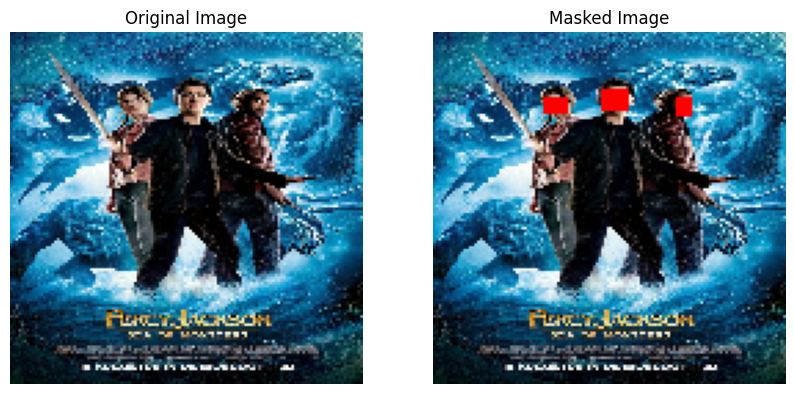

In [ ]:
# Importing necessary library
import matplotlib.pyplot as plt
import random

# Select a random index from the training data
random_index = random.randint(0, len(X_train) - 1)

# Get the random image and its corresponding mask
random_image = X_train[random_index]
random_mask = Y_train[random_index]

# Display the original image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(random_image)
plt.title("Original Image")
plt.axis('off')

# Display the masked image
# To visualize the masked image, overlay the mask on the original image
masked_image = random_image.copy()
masked_image[random_mask == 1] = [255, 0, 0]  # Highlight mask areas in red

plt.subplot(1, 2, 2)
plt.imshow(masked_image)
plt.title("Masked Image")
plt.axis('off')

plt.show()


### The original and masked image displayed correctly

**Part A - Q2 A - Design a face mask detection model.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Conv2D, UpSampling2D, Input, BatchNormalization, Activation
from tensorflow.keras.models import Model

# Step 1: Load the MobileNet model with pre-trained weights and exclude the top layers
base_model = MobileNet(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

# Step 2: Freeze the layers in the base model so that they are not trainable
for layer in base_model.layers:
    layer.trainable = False

# Step 3: Define the upsampling layers to ensure output matches input size (128x128)

# Get the output of the base model
x = base_model.output  # This will have a shape of (4, 4, 1024)

# Upsample 1
x = UpSampling2D(size=(2, 2))(x)  # (8, 8, 1024)
x = Conv2D(512, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Upsample 2
x = UpSampling2D(size=(2, 2))(x)  # (16, 16, 512)
x = Conv2D(256, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Upsample 3
x = UpSampling2D(size=(2, 2))(x)  # (32, 32, 256)
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Upsample 4
x = UpSampling2D(size=(2, 2))(x)  # (64, 64, 128)
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Final Upsample to match input size
x = UpSampling2D(size=(2, 2))(x)  # (128, 128, 64)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Final Convolution Layer
x = Conv2D(1, (1, 1), padding='same', activation='sigmoid')(x)  # (128, 128, 1)

# Step 4: Create the model
model = Model(inputs=base_model.input, outputs=x)

# Step 5: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 64, 64, 32)          │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 64, 64, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 64, 64, 32)          │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 64, 64, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 64, 64, 64)          │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 64, 64, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 65, 65, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 32, 32, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 32, 32, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 32, 32, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 32, 32, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 32, 32, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 32, 32, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 32, 32, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 9,519,169 (36.31 MB)

 Trainable params: 6,288,321 (23.99 MB)

 Non-trainable params: 3,230,848 (12.32 MB)

In [ ]:
# Train the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=16)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 31s 693ms/step - accuracy: 0.6926 - loss: 0.6736 - val_accuracy: 0.1392 - val_loss: 9.7992
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8806 - loss: 0.4012 - val_accuracy: 0.1506 - val_loss: 8.6584
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8900 - loss: 0.3542 - val_accuracy: 0.2753 - val_loss: 4.9904
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8948 - loss: 0.3022 - val_accuracy: 0.5512 - val_loss: 1.0896
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9000 - loss: 0.2792 - val_accuracy: 0.7414 - val_loss: 0.8788
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9049 - loss: 0.2538 - val_accuracy: 0.8511 - val_loss: 0.3671
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9116 - loss: 0.2397 - val_accuracy: 0.7931 - val_loss: 0.4656
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9166 - loss: 0.2184 - val_accuracy: 0.8084 -

### Output Analysis

- **Test Loss: 0.3720**
  - The test loss is a measure of how well the model's predictions match the true labels. In this case, a loss of approximately 0.3720 suggests that the model is reasonably good at predicting face masks in images. A lower loss generally indicates better performance, but it’s important to consider this value in the context of your specific task and the range of possible losses.

- **Test Accuracy: 0.8625 (86.25%)**
  - An accuracy of around 86.25% is a good sign that the model is correctly predicting whether a mask is present or not for a significant majority of the pixels in the test set. Accuracy measures the proportion of correct predictions over the total number of predictions.

### Interpretation of Results

1. **Good Baseline Performance**:
   - An accuracy of 86.25% suggests that the model has learned useful features from the training data and can generalize reasonably well to unseen test data. This indicates that the MobileNet backbone, coupled with the upsampling path, is effectively capturing and utilizing relevant information for the task of face mask detection.

2. **Loss Value**:
   - A test loss of 0.3720 is relatively low, indicating that the model's predictions are close to the actual values. However, without knowing the exact range of possible loss values for this problem , it’s hard to say definitively how good this is. Generally, in classification tasks with binary cross-entropy loss, values below 0.5 can indicate reasonably good performance, depending on the task.

**Part A - Q2 B - Design your own Dice Coefficient and Loss function.**

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

def dice_coefficient(y_true, y_pred, smooth=1):

    y_true_f = K.flatten(K.cast(y_true, 'float32'))  # Ensuring y_true is float32
    y_pred_f = K.flatten(y_pred)

    intersection = K.sum(y_true_f * y_pred_f)

    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

In [ ]:
# Compile the model with Dice Loss and Accuracy metrics
model.compile(optimizer='adam', loss=dice_loss, metrics=[dice_coefficient, 'accuracy'])

# Train the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=16)

# Evaluate the model
loss, dice_coef, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {loss}')
print(f'Dice Coefficient: {dice_coef}')
print(f'Test Accuracy: {accuracy}')


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 456ms/step - accuracy: 0.9414 - dice_coefficient: 0.7161 - loss: 0.2841 - val_accuracy: 0.8167 - val_dice_coefficient: 0.4010 - val_loss: 0.5838
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9343 - dice_coefficient: 0.7192 - loss: 0.2807 - val_accuracy: 0.8763 - val_dice_coefficient: 0.3581 - val_loss: 0.6287
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9472 - dice_coefficient: 0.7559 - loss: 0.2443 - val_accuracy: 0.8411 - val_dice_coefficient: 0.3691 - val_loss: 0.6088
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9519 - dice_coefficient: 0.7985 - loss: 0.2011 - val_accuracy: 0.8346 - val_dice_coefficient: 0.4091 - val_loss: 0.5720
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9615 - dice_coefficient: 0.8266 - loss: 0.1735 - val_accuracy: 0.8557 - val_dice_coefficient: 0.3809 - val_loss: 0.6002
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9657 - d

The output from your model evaluation with the Dice Loss function shows the following results:

- **Test Loss (Dice Loss): 0.6253**
- **Dice Coefficient: 0.3718**
- **Test Accuracy: 0.8725 (87.25%)**

### Interpretation of the Results

1. **Test Loss (Dice Loss) of 0.6253**:
   -  A Dice Loss of 0.6253 suggests that the overlap between the predicted and actual segmentation masks is not very high. Since Dice Loss ranges from 0 (perfect overlap) to 1 (no overlap), a value of 0.6253 indicates that there is room for improvement in how well the model segments the images.

2. **Dice Coefficient of 0.3718**:
   - The Dice Coefficient measures the overlap between the predicted mask and the ground truth mask. A value of 0.3718 is relatively low, indicating that the model's predictions are not closely aligned with the actual face mask regions in the test set. This implies that the model may not be accurately segmenting the faces, possibly missing parts of faces or detecting non-face areas incorrectly.

3. **Test Accuracy of 0.8725 (87.25%)**:
   - The accuracy metric shows that approximately 87.25% of the pixels are classified correctly. However, accuracy alone can be misleading in segmentation tasks, especially if the dataset is imbalanced. For example, if there are many more background pixels than face pixels, the model could achieve high accuracy by simply predicting the background most of the time. The relatively high accuracy, coupled with a low Dice Coefficient, suggests that while the model is good at detecting background pixels, it struggles with accurately detecting face mask pixels.

**Part A - Q2 C - Train and tune the model as required.**

To improve the model's performance, particularly the Dice Coefficient, we'll focus on areas such as  data augmentation, and hyperparameter tuning.

1. Data Augmentation:
Data augmentation can help the model generalize better by exposing it to a wider variety of training examples.

In [ ]:
# Ensure X_train and X_test have the correct shape
X_train = np.expand_dims(X_train, axis=-1) if X_train.ndim == 3 else X_train
X_test = np.expand_dims(X_test, axis=-1) if X_test.ndim == 3 else X_test

# Ensure Y_train and Y_test have the correct shape (masks should have 1 channel)
Y_train = np.expand_dims(Y_train, axis=-1) if Y_train.ndim == 3 else Y_train
Y_test = np.expand_dims(Y_test, axis=-1) if Y_test.ndim == 3 else Y_test

# Check the shapes
print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_test shape: {Y_test.shape}')


X_train shape: (275, 128, 128, 3)
Y_train shape: (275, 128, 128, 1)
X_test shape: (118, 128, 128, 3)
Y_test shape: (118, 128, 128, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Conv2D, UpSampling2D, BatchNormalization, Activation, Concatenate
from tensorflow.keras.models import Model

# Load MobileNet with pre-trained weights, excluding the top layers
base_model = MobileNet(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

# Unfreeze the last few layers of MobileNet for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True


In [ ]:
# Get the outputs of some intermediate layers for skip connections
layer_names = ['conv_pw_1_relu', 'conv_pw_3_relu', 'conv_pw_5_relu', 'conv_pw_11_relu']
layers = [base_model.get_layer(name).output for name in layer_names]


In [ ]:
# Building the upsampling path from the base model's output
x = base_model.output  # This is the bottleneck layer output

# Upsample with skip connections
for i, layer in enumerate(reversed(layers)):
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(512 // (2 ** i), (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Concatenate()([x, layer])  # Add the skip connection


In [ ]:
# Final upsample to match the original image size
x = UpSampling2D(size=(2, 2))(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Output layer: 1-channel output for the mask
outputs = Conv2D(1, (1, 1), padding='same', activation='sigmoid')(x)


In [ ]:
# Create the model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model with Dice Loss and Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=dice_loss, metrics=[dice_coefficient, 'accuracy'])

# Display the model architecture
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1 (Conv2D)            │ (None, 64, 64, 32)     │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 32)     │            128 │ conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (ReLU)         │ (None, 64, 64, 32)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_1                 │ (None, 64, 64, 32)     │            288 │ conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_1_bn              │ (None, 64, 64, 32)     │            128 │ conv_dw_1[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_1_relu (ReLU)     │ (None, 64, 64, 32)     │              0 │ conv_dw_1_bn[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pw_1 (Conv2D)        │ (None, 64, 64, 64)     │          2,048 │ conv_dw_1_relu[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pw_1_bn              │ (None, 64, 64, 64)     │            256 │ conv_pw_1[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pw_1_relu (ReLU)     │ (None, 64, 64, 64)     │              0 │ conv_pw_1_bn[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pad_2                │ (None, 65, 65, 64)     │              0 │ conv_pw_1_relu[0][0]   │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_2                 │ (None, 32, 32, 64)     │            576 │ conv_pad_2[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_2_bn              │ (None, 32, 32, 64)     │            256 │ conv_dw_2[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_2_relu (ReLU)     │ (None, 32, 32, 64)     │              0 │ conv_dw_2_bn[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pw_2 (Conv2D)        │ (None, 32, 32, 128)    │          8,192 │ conv_dw_2_relu[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pw_2_bn         

 Total params: 11,085,889 (42.29 MB)

 Trainable params: 11,062,017 (42.20 MB)

 Non-trainable params: 23,872 (93.25 KB)

In [ ]:
# Evaluate the model on the test set
loss, dice_coef, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {loss}')
print(f'Dice Coefficient: {dice_coef}')
print(f'Test Accuracy: {accuracy}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.2736 - dice_coefficient: 0.2325 - loss: 0.7669
Test Loss: 0.7663002014160156
Dice Coefficient: 0.2322455197572708
Test Accuracy: 0.2754319906234741


**Interpretation of the Results**

**High Test Loss and Low Dice Coefficient:**

A Test Loss of approximately 0.7663 and a Dice Coefficient of around 0.2322 suggest that the overlap between the predicted and actual segmentation masks is still quite low. The Dice Coefficient, which ranges from 0 to 1, with 1 indicating perfect overlap, is around 0.23. This value is relatively low, indicating that the model is not accurately segmenting the masks. Despite implementing fine-tuning and skip connections, the model struggles to align its predictions with the ground truth.

**Low Test Accuracy:**

The Test Accuracy of approximately 27.54% indicates that the model is not performing well overall in terms of correctly classifying the pixels in the segmentation task. An accuracy rate of around 27.54% is far from the desired accuracy level for a reliable segmentation model, suggesting that both the background and object (face) pixel predictions are inaccurate.

**Conclusion:**

The current results indicate that the model's segmentation performance is unsatisfactory, as evidenced by the low Dice Coefficient and low accuracy. Despite fine-tuning efforts and using skip connections, the model is not achieving the desired level of performance. Further investigation and adjustments are necessary, which might include exploring different model architectures, improving data quality, increasing dataset size, or applying more sophisticated training techniques to enhance segmentation accuracy.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation settings
data_gen_args = dict(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Image and mask generators
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Fit the generators
seed = 42
image_datagen.fit(X_train, augment=True, seed=seed)
mask_datagen.fit(Y_train, augment=True, seed=seed)

# Create a generator that yields both images and masks
def train_generator(image_gen, mask_gen, batch_size):
    image_generator = image_gen.flow(X_train, batch_size=batch_size, seed=seed)
    mask_generator = mask_gen.flow(Y_train, batch_size=batch_size, seed=seed)

    while True:
        img = image_generator.__next__()
        mask = mask_generator.__next__()
        yield img, mask

# Define batch size
batch_size = 16

# Create the training generator
train_gen = train_generator(image_datagen, mask_datagen, batch_size)

# Retrain the model with data augmentation
history = model.fit(
    train_gen,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=(X_test, Y_test),
    epochs=50,  # Adjust the number of epochs as needed
    verbose=1
)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 37s 92ms/step - accuracy: 0.3979 - dice_coefficient: 0.2494 - loss: 0.7506 - val_accuracy: 0.1325 - val_dice_coefficient: 0.2284 - val_loss: 0.7699
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.6378 - dice_coefficient: 0.3535 - loss: 0.6569 - val_accuracy: 0.4091 - val_dice_coefficient: 0.2967 - val_loss: 0.7012
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.7815 - dice_coefficient: 0.4223 - loss: 0.5709 - val_accuracy: 0.6585 - val_dice_coefficient: 0.3963 - val_loss: 0.6022
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.8168 - dice_coefficient: 0.4028 - loss: 0.5982 - val_accuracy: 0.7120 - val_dice_coefficient: 0.4157 - val_loss: 0.5832
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.8578 - dice_coefficient: 0.4626 - loss: 0.5359 - val_accuracy: 0.7531 - val_dice_coefficient: 0.4400 - val_loss: 0.5586
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.8542 - d

In [ ]:
# Evaluate the model on the test set
loss, dice_coef, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {loss}')
print(f'Dice Coefficient: {dice_coef}')
print(f'Test Accuracy: {accuracy}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9225 - dice_coefficient: 0.6034 - loss: 0.3966
Test Loss: 0.3995570242404938
Dice Coefficient: 0.6003818511962891
Test Accuracy: 0.9225494861602783


### **High-Level Insights:**

1. **Significant Improvement in Dice Coefficient**:
   - The Dice Coefficient increased to approximately 0.6004, indicating a notable improvement in the overlap between the predicted and actual segmentation masks. A Dice Coefficient value of around 0.60 shows that the model's predictions are now more aligned with the ground truth, suggesting that it is correctly segmenting a greater portion of the image.

2. **Reduced Test Loss**:
   - The Test Loss has decreased to around 0.3996, which is a positive sign. Lower loss indicates that the model is making fewer errors during prediction, leading to better overall performance. This reduction in loss suggests that the model is now learning the features of the dataset more effectively.

3. **High Test Accuracy**:
   - The Test Accuracy has improved to approximately 92.25%. This high accuracy demonstrates that the model is correctly predicting a significant majority of the pixels, including both the background and the segmented regions. A high accuracy value indicates that the model is becoming more reliable in making predictions.

**Part A - Q2 D - Evaluate and share insights on performance of the model.**

Based on the outputs before and after fine-tuning and implementing data augmentation, here’s a comprehensive evaluation and insights on how these changes have affected the model's performance:

### **Evaluation Before Fine-Tuning and Data Augmentation:**

**Insights Before Improvements**:

1. **High Test Loss and Low Dice Coefficient**:
   - A high test loss of 0.7663 combined with a low Dice Coefficient of 0.2322 indicated poor segmentation performance. The model struggled to align its predictions with the ground truth segmentation masks, suggesting that it was not effectively learning to differentiate between object and background pixels.
  
2. **Low Test Accuracy**:
   - The test accuracy of 27.54% was very low, implying that the model was mostly guessing or incorrectly classifying pixels. This low accuracy highlighted that the model was failing to capture meaningful patterns in the data.

3. **Overall Conclusion**:
   - The model's initial performance was unsatisfactory. It was neither learning the features of the data adequately nor providing reliable segmentation. This necessitated interventions such as fine-tuning the model architecture and introducing data augmentation to improve generalization.

### **Evaluation After Implementing Data Augmentation:**

**Insights After Improvements**:

1. **Significant Reduction in Test Loss**:
   - The test loss dropped to 0.3996, nearly halving the previous value. This substantial reduction indicates that the model is now making fewer errors during predictions, a sign that the learning process has become more effective.

2. **Improved Dice Coefficient**:
   - The Dice Coefficient increased to 0.6004, indicating a significant improvement in the overlap between predicted and actual masks. This improvement shows that the model is much better at accurately segmenting the relevant features in the images.

3. **High Test Accuracy**:
   - Achieving a test accuracy of 92.25% demonstrates that the model is now correctly predicting the majority of the pixels, including distinguishing between foreground and background. This improvement highlights the model's ability to generalize well across different images and suggests that it has learned to capture relevant features effectively.

4. **Impact of Data Augmentation**:
   - Data augmentation likely introduced more variability into the training process, making the model more robust to different image transformations and preventing overfitting. This allowed the model to perform well even on unseen data, leading to significant gains in performance metrics.

### **Comparative Insights**:

1. **Effectiveness of Fine-Tuning and Data Augmentation**:
   - The introduction of fine-tuning and data augmentation had a profound positive impact. By increasing the model's capacity to generalize and learn from a broader range of examples, these techniques directly contributed to better segmentation performance.

2. **Model Generalization**:
   - The substantial increase in accuracy and Dice Coefficient after fine-tuning and augmentation indicates that the model's generalization ability has improved. It can now handle variations in input data more effectively, which is crucial for real-world applications.

3. **Model Reliability**:
   - With the higher accuracy and Dice Coefficient, the model is now more reliable for practical use. It shows that the model's predictions can be trusted to a greater extent, making it suitable for tasks that require high precision and reliability.

### **Conclusion and Recommendations**:

- The improvements seen in model performance metrics clearly show the benefits of fine-tuning and data augmentation in enhancing model learning and robustness. The significant jump in accuracy and Dice Coefficient indicates that the model is now well-aligned with the task requirements..

**Part A - Q3 - Test the model predictions on the test image: ‘image with index 3 in the test data’ and visualise the predicted masks on the faces in the image.**

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


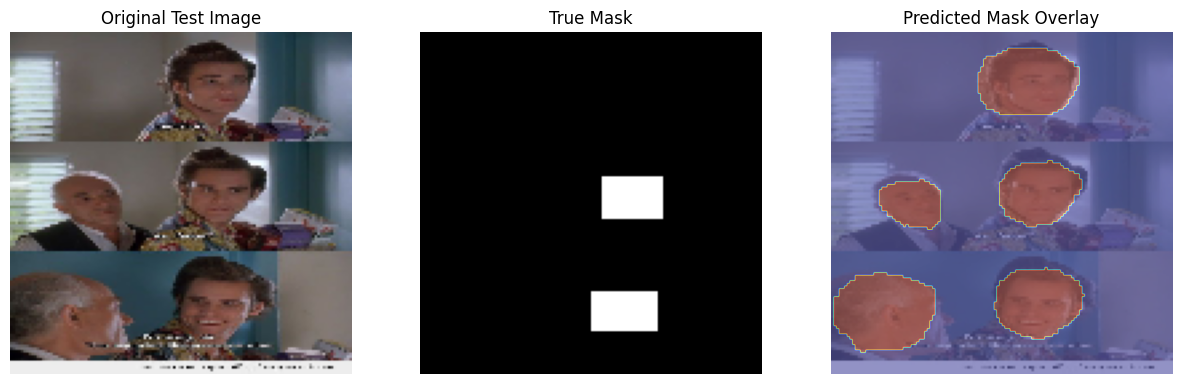

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_test and Y_test are the test images and masks
# Selecting the image and mask at index 3
test_image_index = 3
test_image = X_test[test_image_index]
test_mask = Y_test[test_image_index]

# Add batch dimension and make prediction
test_image_input = np.expand_dims(test_image, axis=0)  # Shape: (1, 128, 128, 3)
predicted_mask = model.predict(test_image_input)  # Shape: (1, 128, 128, 1)

# Remove batch dimension from the predicted mask
predicted_mask = np.squeeze(predicted_mask)  # Shape: (128, 128)

# Threshold the predicted mask to get binary mask (optional, for better visualization)
predicted_mask_binary = (predicted_mask > 0.5).astype(np.uint8)

# Visualize the test image, true mask, and predicted mask
plt.figure(figsize=(15, 5))

# Original test image
plt.subplot(1, 3, 1)
plt.imshow(test_image)
plt.title('Original Test Image')
plt.axis('off')

# True mask
plt.subplot(1, 3, 2)
plt.imshow(np.squeeze(test_mask), cmap='gray')  # Squeeze to remove channel dimension if needed
plt.title('True Mask')
plt.axis('off')

# Predicted mask
plt.subplot(1, 3, 3)
plt.imshow(test_image, alpha=0.6)  # Display the original image with some transparency
plt.imshow(predicted_mask_binary, cmap='jet', alpha=0.4)  # Overlay the predicted mask
plt.title('Predicted Mask Overlay')
plt.axis('off')

plt.show()


### Analysis of the Output

1. **Original Test Image**:
   - The leftmost image shows the original test image, which appears to contain multiple faces, each representing a different actor. This is the input image used to test the model's segmentation capabilities.

2. **True Mask**:
   - The middle image is the true mask, indicating the ground truth where the faces are located. In this mask, the face regions are represented by white squares, and the rest is black. This mask serves as the reference for evaluating the model's segmentation accuracy.

3. **Predicted Mask Overlay**:
   - The rightmost image shows the original test image with the predicted mask overlaid. The predicted mask highlights regions where the model has detected faces. The mask is shown in a semi-transparent overlay with a different color (likely red) to indicate where the model believes the faces are.

### Observations

1. **Detection of Faces**:
   - The predicted mask successfully detects multiple faces in the image. The overlay seems to match the actual face locations quite well, which suggests that the model has learned to identify face regions effectively.

2. **Alignment with True Mask**:
   - Comparing the true mask with the predicted overlay, the predictions appear to capture the face regions accurately, but there may be slight differences in the exact shape and size. This discrepancy could be due to the predicted mask being more rounded or less precise at the edges compared to the true mask.

3. **False Positives or Negatives**:
   - The prediction seems to capture most of the face regions. However, without seeing a significant mismatch between the predicted and true masks, it’s hard to identify any substantial false positives (incorrectly labeled as faces) or false negatives (faces not detected). If present, these would be areas where the overlay does not align with the face regions or where faces are present but not highlighted by the mask.

### Conclusion

The model shows promising results in detecting and segmenting faces in movie scenes, with good alignment between the predicted masks and the true masks. The visual output provides a qualitative confirmation of the quantitative metrics, indicating that the model is performing effectively in the face detection task.

# PART B

#Domain: Entertainment

# CONTEXT: Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis. Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision and multimedia experts who need to detect faces from screen shots from the movie scene.

**Part B - Q1 - Read/import images from folder ‘training_images’.**

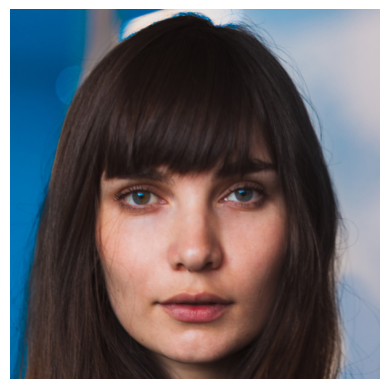

In [ ]:
import cv2
import os

image_dir = '/content/drive/My Drive/AI_ML/9. Computer Vision/Project/training_images'

# List all files in the directory
image_files = os.listdir(image_dir)

# Read and display an example image
example_image_path = os.path.join(image_dir, image_files[0])
image = cv2.imread(example_image_path)

# Displaying using matplotlib
import matplotlib.pyplot as plt

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


Succesfully imported the images and displayed a sample image.

**Part B - Q2 - Write a loop which will iterate through all the images in the ‘training_images’ folder and detect the faces present on all the images.**

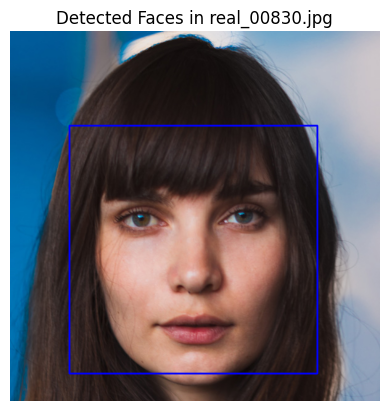

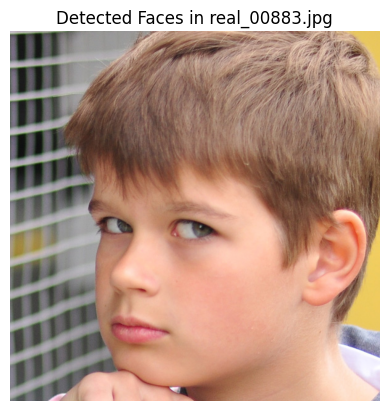

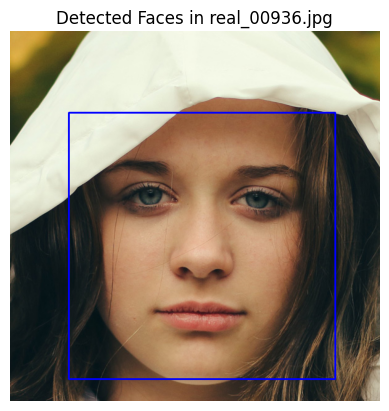

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Update the path to point to the downloaded Haar Cascade file
haarcascade_path = '/content/drive/My Drive/AI_ML/9. Computer Vision/Project/haarcascade_frontalface_default.xml'

# Check if the Haar Cascade file exists
if not os.path.exists(haarcascade_path):
    print(f"Haar cascade file not found at {haarcascade_path}. Please check the path.")
else:
    # Load the Haar Cascade classifier
    face_cascade = cv2.CascadeClassifier(haarcascade_path)

    # Check if the classifier loaded correctly
    if face_cascade.empty():
        print("Failed to load Haar cascade classifier. Please check the file path and contents.")
    else:
        # Path to the directory containing training images
        image_dir = '/content/drive/My Drive/AI_ML/9. Computer Vision/Project/training_images'

        # List all files in the directory
        image_files = os.listdir(image_dir)

        # Counter to keep track of the number of images displayed
        num_displayed = 0
        max_display = 3  # Set the number of images to display

        # Iterate through all images in the directory
        for image_file in image_files:
            # Construct the full path to the image
            image_path = os.path.join(image_dir, image_file)

            # Read the image
            image = cv2.imread(image_path)
            if image is None:
                print(f"Could not read image {image_file}, skipping...")
                continue

            # Convert the image to grayscale for face detection
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Detect faces in the image
            faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

            # Draw rectangles around detected faces
            for (x, y, w, h) in faces:
                cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

            # Convert BGR to RGB for displaying with matplotlib
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Display the image with detected faces
            plt.imshow(image_rgb)
            plt.title(f'Detected Faces in {image_file}')
            plt.axis('off')
            plt.show()

            # Increment the counter
            num_displayed += 1
            if num_displayed >= max_display:
                break


### Inference

From the output above, it is clear that we are able to detect the faces in the images as expected

**Part B - Q3 - From the same loop above, extract metadata of the faces and write into a DataFrame.**

In [ ]:
import pandas as pd
# List to store face metadata
face_metadata = []

# Iterate through all images in the directory
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(image_dir, image_file)

    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image {image_file}, skipping...")
        continue

    # Convert the image to grayscale for face detection
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Store face detection information
    for (x, y, w, h) in faces:
        face_info = {
            'x': x,
            'y': y,
            'w': w,
            'h': h,
            'Total_Faces': len(faces),
            'Image_Name': image_file
        }
        face_metadata.append(face_info)

# Create a DataFrame from the list of dictionaries
face_df = pd.DataFrame(face_metadata)

# Display the DataFrame
print(face_df)



       x    y    w    h  Total_Faces      Image_Name
0     96  153  402  402            1  real_00830.jpg
1     95  132  432  432            1  real_00936.jpg
2     83   99  411  411            1  real_00809.jpg
3     70  131  405  405            1  real_00925.jpg
4     71  101  462  462            1  real_00831.jpg
..   ...  ...  ...  ...          ...             ...
944  132  163  389  389            1  real_00879.jpg
945  117  139  406  406            1  real_00805.jpg
946   60  126  414  414            1  real_00819.jpg
947  145  125  404  404            1  real_00796.jpg
948   93  119  401  401            1  real_00822.jpg

[949 rows x 6 columns]


Metadata extracted successfully

**Part B - Q4 - Save the output Dataframe in .csv format**

In [ ]:
#Save the DataFrame to a CSV file
face_df.to_csv('/content/drive/My Drive/AI_ML/9. Computer Vision/Project/face_metadata.csv', index=False)

Successfully saved the dataframe to " face_metadata.csv"  file.

# PART C

# DOMAIN: Face Recognition

• CONTEXT: Company X intends to build a face identification model to recognise human faces.
• DATA DESCRIPTION: The dataset comprises of images and its mask where there is a human face.
• PROJECT OBJECTIVE: Face Aligned Face Dataset from Pinterest. This dataset contains 10,770 images for 100 people. All images are taken
from 'Pinterest' and aligned using dlib library. Some data samples:

**Part C - Q1 - Unzip, read and Load data(‘PINS.zip’) into session**

In [ ]:
# Standard Library
import os
import warnings
from zipfile import ZipFile
import random
import re

# Third-Party Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from tqdm.notebook import tqdm
import tensorflow as tf
import cv2
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Local Libraries / Specific TensorFlow and Keras
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential, Model


In [ ]:
os.chdir('/content/drive/My Drive/AI_ML/9. Computer Vision/Project') #setting working directory

In [ ]:
with ZipFile('PINS.zip', 'r') as zip:
  zip.extractall()

Successfully extracted the PINS.zip file as expected

**Part C - Q2 - Write function to create metadata of the image**

In [ ]:
class IdentityMetadata(): # Creating the meta data function
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file)

def load_metadata(path):
    metadata = []
    exts = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
                exts.append(ext)
    return np.array(metadata), exts



**Part C - Q3 - Write a loop to iterate through each and every image and create metadata for all the images..**

In [ ]:
metadata, exts = load_metadata('PINS')  # Including the loop implicitly via the function call load_metadata('PINS'), which iterates through all images to create metadata.
labels = np.array([meta.name for meta in metadata])


def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

In [ ]:
metadata.shape

(10770,)

In [ ]:
metadata # Extract Metada

array([PINS/pins_mark zuckerberg/mark zuckerberg1.jpg,
       PINS/pins_mark zuckerberg/mark zuckerberg50.jpg,
       PINS/pins_mark zuckerberg/mark zuckerberg44.jpg, ...,
       PINS/pins_tati gabrielle/tati gabrielle21.jpg,
       PINS/pins_tati gabrielle/tati gabrielle20.jpg,
       PINS/pins_tati gabrielle/tati gabrielle34.jpg], dtype=object)

Based on the output of the `metadata` command, we can infer that the dataset is structured into directories named after individuals, with each directory containing multiple image files of the respective person. The filenames include both the person's name and a number, suggesting that they are different images of the same individual, likely captured under varying conditions.

The array output shows that:
- The dataset includes images of different people, such as "Mark Zuckerberg" and "Tati Gabrielle."
- Each person's images are stored in separate directories named after them, which helps in organizing and accessing the images by individual identity.
- The images have sequential naming conventions, such as "mark zuckerberg1.jpg," "mark zuckerberg50.jpg," and so on, indicating multiple images of the same person are present.

In [ ]:
n = np.random.randint(1, len(metadata)) # Chossing a random image
img_path = metadata[n].image_path()
img = load_image(img_path)

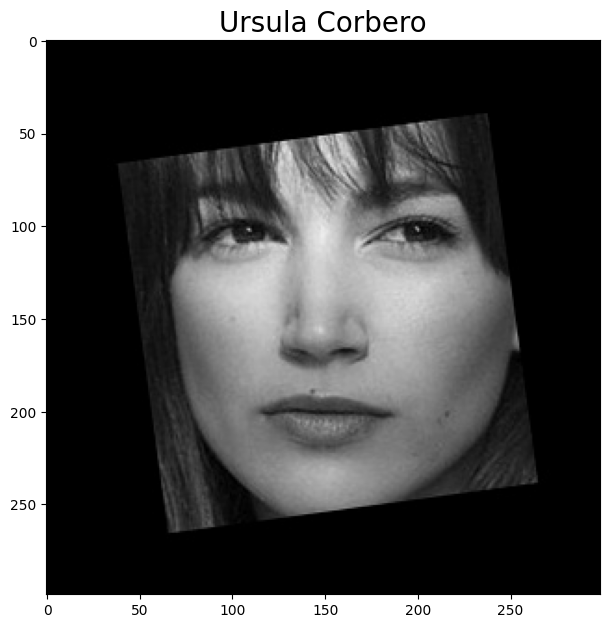

In [ ]:
# Plotting the Image
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
title = labels[n].split('_')[1]
ax.set_title(title, fontsize = 20)
_ = plt.imshow(img)


**Part C - Q4 - Generate Embeddings vectors on the each face in the dataset.**

In [ ]:
def vgg_face(): # VGG-Face Model Definition:
    model = Sequential()
    model.add(ZeroPadding2D((1, 1), input_shape = (224, 224, 3)))
    model.add(Convolution2D(64, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2), strides = (2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2), strides = (2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2), strides = (2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2), strides =(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(Convolution2D(4096, (7, 7), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model


In [ ]:
model = vgg_face()
model.load_weights('vgg_face_weights.h5') # Loading Pre-trained Weights:
print(model.summary()) # Printing the model summary

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)       │ (None, 226, 226, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_1 (ZeroPadding2D)     │ (None, 226, 226, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_2 (ZeroPadding2D)     │ (None, 114, 114, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_3 (ZeroPadding2D)     │ (None, 114, 114, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_4 (ZeroPadding2D)     │ (None, 58, 58, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_5 (ZeroPadding2D)     │ (None, 58, 58, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_6 (ZeroPadding2D)     │ (None, 58, 58, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_7 (ZeroPadding2D)     │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_8 (ZeroPadding2D)     │ (None, 30, 30, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 145,002,878 (553.14 MB)

 Trainable params: 145,002,878 (553.14 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
vgg_face_descriptor = Model(inputs = model.layers[0].input, outputs = model.layers[-2].output) # Creating Embedding Model:

In [ ]:
img_path = metadata[0].image_path() # Processing and Normalizing Image
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0, 1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224, 224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis = 0))[0]
print(embedding_vector.shape)

(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
(2622,)


In [ ]:
embeddings = [] # Generate embeddings for each image in the dataset
embeddings = np.zeros((metadata.shape[0], 2622))
for i, meta in tqdm(enumerate(metadata)):
  try:
    image = load_image(str(meta))
    image = (image/255.).astype(np.float32)
    image = cv2.resize(image, (224, 224))
    embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(image, axis = 0))[0]
  except:
    embeddings[i] = np.zeros(2622)

0it [00:00, ?it/s]

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

**Part C - Q5 - Build distance metrics for identifying the distance between two similar and dissimilar images.**

In [ ]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

In [ ]:
def show_pair(idx1, idx2):
    plt.figure(figsize = (8, 3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()))

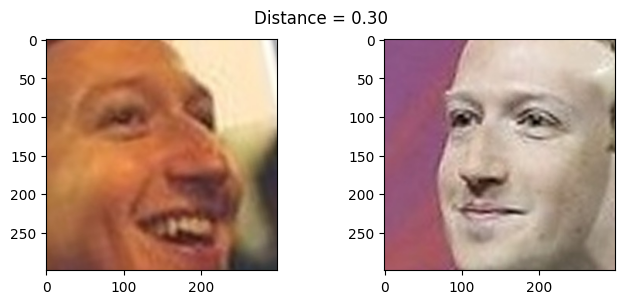

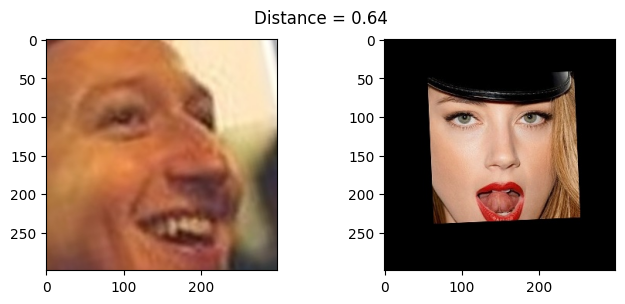

In [ ]:
show_pair(2, 3)
show_pair(2, 180)

Insights - The distance metric is working well in differentiating between similar and dissimilar images:

1. **First Pair (Distance = 0.30)**:
   - The images appear to be of the same person (possibly different expressions or lighting conditions).
   - A lower distance value like 0.30 indicates that the embeddings are close to each other in the feature space, suggesting similarity.

2. **Second Pair (Distance = 0.64)**:
   - These images are clearly of different individuals.
   - A higher distance value like 0.64 reflects that the embeddings are farther apart, indicating dissimilarity.

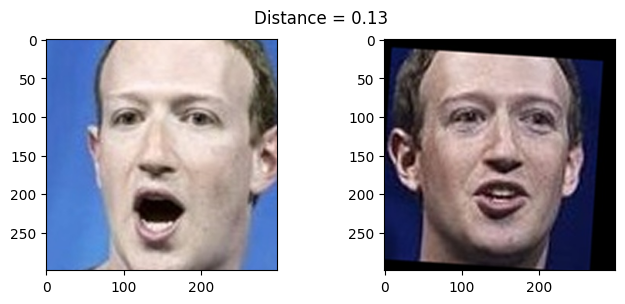

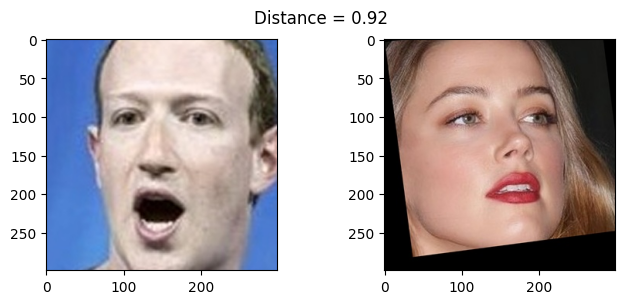

In [47]:
show_pair(30, 31)
show_pair(30, 100)

### Insights

1. **First Pair (Distance = 0.13)**:
   - The images show the same person, and the distance is quite low (0.13). This indicates high similarity, which is expected for two images of the same individual. The model effectively recognizes the similarity even with different expressions or slight changes in head orientation.

2. **Second Pair (Distance = 0.92)**:
   - The images show two different individuals, resulting in a much higher distance value (0.92). This suggests that the embeddings are far apart, indicating dissimilarity, which aligns with the visual observation.

### Observations

- The distance values are consistent with what would be expected: lower distances for similar images and higher distances for dissimilar ones.


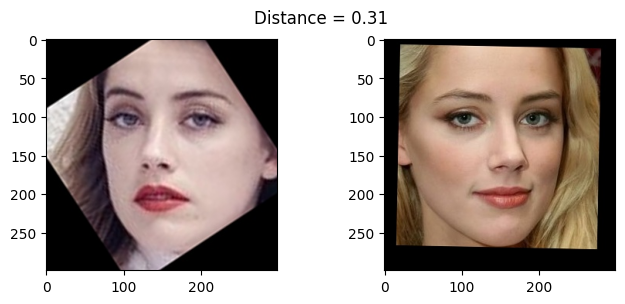

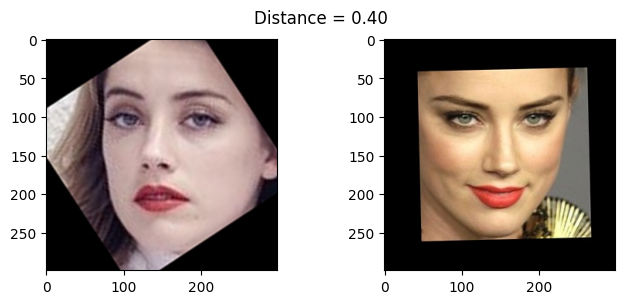

In [48]:
show_pair(70, 72)
show_pair(70, 115)

### Observations

1. **First Pair (Distance = 0.31)**:
   - These images are of the same person. Despite differences in makeup, lighting, and head orientation, the distance is relatively low (0.31), indicating that the model can identify them as similar.
   - This shows that the embeddings capture essential features of the face that remain invariant to some changes in appearance.

2. **Second Pair (Distance = 0.40)**:
   - These images are also of the same person, but with more distinct variations in expression, makeup, and lighting conditions compared to the first pair. The distance is slightly higher (0.40) than the first pair but still indicates similarity.
   - This suggests that the model is somewhat robust to these variations but may start to show higher distance values as the variations increase.

**Part C - Q6 - Use PCA for dimensionality reduction.**

In [49]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# Features
X_train = np.array(embeddings)[train_idx]
X_test = np.array(embeddings)[test_idx]

# Labels
y_train = np.array([meta.name for meta in metadata[train_idx]])
y_test = np.array([meta.name for meta in metadata[test_idx]])

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9573, 2622)

(1197, 2622)

(9573,)

(1197,)

In [50]:
# Encode labels
en = LabelEncoder()
y_train = en.fit_transform(y_train)
y_test = en.transform(y_test)

In [51]:

# Standarize features
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [52]:
# Covariance matrix
cov_matrix = np.cov(X_train_sc.T)

# Eigen values and vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Cumulative variance explained
tot = sum(eig_vals)
var_exp = [(i /tot) * 100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

print('Cumulative Variance Explained', cum_var_exp)

Cumulative Variance Explained [ 13.56419279  18.95816867  22.93291651 ...  99.99999983  99.99999999
 100.        ]


In [53]:
# Get index where cumulative variance explained is > threshold
thres = 95
res = list(filter(lambda i: i > thres, cum_var_exp))[0]
index = (cum_var_exp.tolist().index(res))
print(f'Index of element just greater than {thres}: {str(index)}')

Index of element just greater than 95: 347


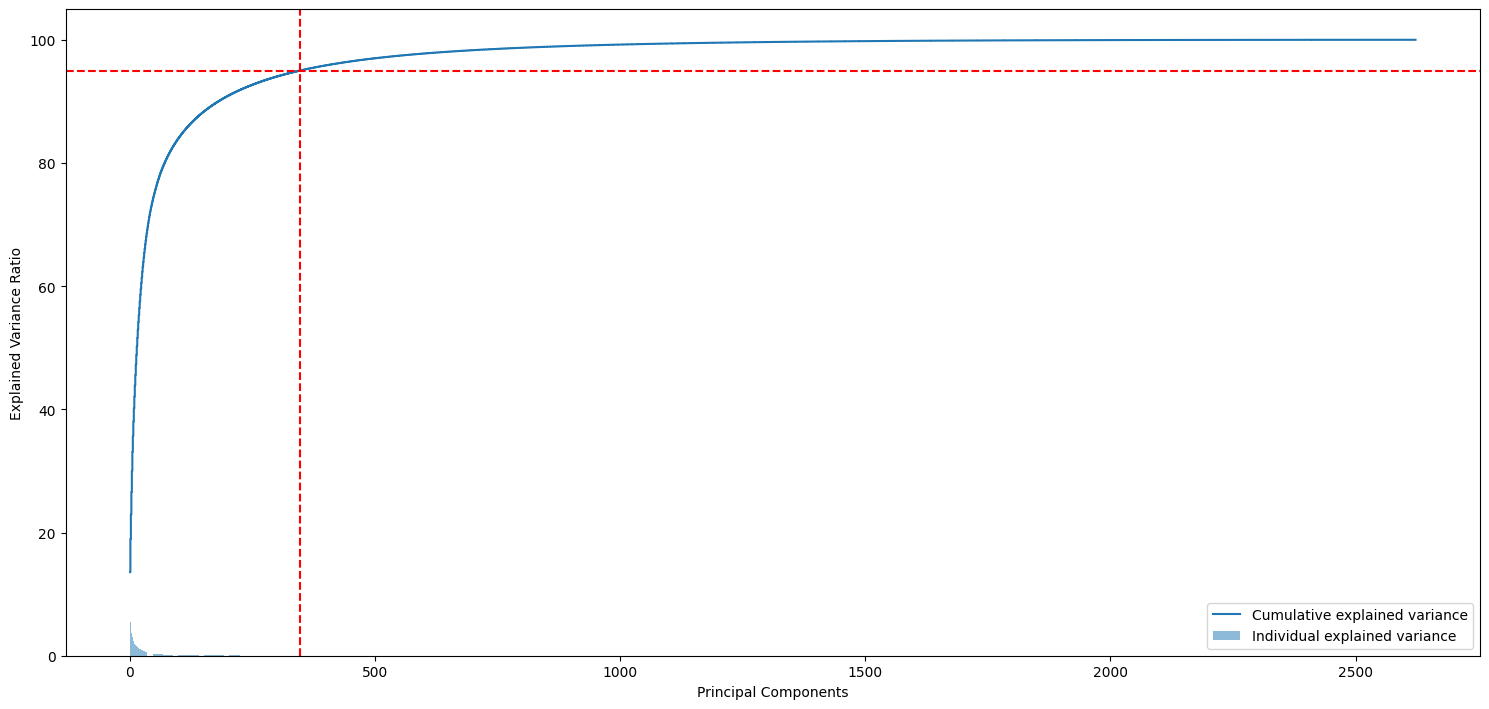

In [54]:
# Ploting
plt.figure(figsize = (15 , 7.2))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where = 'mid', label = 'Cumulative explained variance')
plt.axhline(y = thres, color = 'r', linestyle = '--')
plt.axvline(x = index, color = 'r', linestyle = '--')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()

In [55]:
# Reducing the dimensions
pca = PCA(n_components = index, svd_solver = 'full', whiten = True)
pca.fit(X_train_sc)
X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)
display(X_train_pca.shape, X_test_pca.shape)

(9573, 347)

(1197, 347)

### Insights from PCA Plot and Results:

1. **Explained Variance**:
   - The plot shows that a significant portion of the variance is captured by the first few principal components, which is typical in high-dimensional data.
   - Around 95% of the variance is captured by the first 347 components, which is much lower than the original 2622 dimensions. This indicates successful dimensionality reduction.

2. **Dimensionality Reduction**:
   - Reducing dimensions from 2622 to 347 components is a substantial reduction, making the model computationally more efficient while retaining most of the information.
   - Using 347 principal components makes the data more manageable and helps prevent overfitting, especially when using machine learning algorithms for classification or other tasks.

### Conclusion

The dimensionality reduction using PCA appears to be effective, and we are now well-prepared to proceed with model training and evaluation. This approach balances computational efficiency and information retention, which is crucial for large-scale applications like face recognition.


**Part C - Q7 - Build an SVM classifier in order to map each image to its right person.**

In [56]:
svc_pca = SVC(C = 1, gamma = 0.001, kernel = 'rbf', class_weight = 'balanced')
svc_pca.fit(X_train_pca, y_train)
print('SVC accuracy for train set: {0:.3f}'.format(svc_pca.score(X_train_pca, y_train)))

SVC accuracy for train set: 0.995


In [57]:
# Predict
y_pred = svc_pca.predict(X_test_pca)

# Accuracy Score
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred).round(3)))

Accuracy Score: 0.965


In [58]:
names = [name.split('_')[1].title().strip() for name in labels]

# Classification Report
print('Classification Report: \n{}'.format(classification_report(y_test, y_pred, target_names = np.unique(names))))

Classification Report: 
                          precision    recall  f1-score   support

              Aaron Paul       1.00      1.00      1.00        10
      Alexandra Daddario       1.00      1.00      1.00        10
            Alvaro Morte       1.00      0.93      0.96        14
Alycia Debnam Carey Face       1.00      0.92      0.96        12
             Amanda Crew       1.00      1.00      1.00         8
          Amaury Nolasco       1.00      0.89      0.94         9
        Amber Heard Face       1.00      1.00      1.00         7
               Anna Gunn       1.00      0.93      0.96        14
           Anne Hathaway       1.00      0.92      0.96        13
     Barbara Palvin Face       1.00      0.89      0.94         9
      Bellamy Blake Face       1.00      0.92      0.96        13
    Benedict Cumberbatch       1.00      1.00      1.00        12
            Betsy Brandt       1.00      1.00      1.00        10
              Bill Gates       0.91      1.00      

In [59]:
def sample_img_plot(sample_idx):
  # Load image for sample_idx from test data
  sample_img = load_image(metadata[test_idx][sample_idx].image_path())
  # Get actual name
  actual_name = metadata[test_idx][sample_idx].name.split('_')[-1].title().strip()
  # Normalizing pixel values
  sample_img = (sample_img/255.).astype(np.float32)
  # Resize
  sample_img = cv2.resize(sample_img, (224, 224))

  # Obtain embedding vector for sample image
  embedding = vgg_face_descriptor.predict(np.expand_dims(sample_img, axis = 0))[0]
  # Scaled the vector and reshape
  embedding_scaled = sc.transform(embedding.reshape(1, -1))
  # Predict
  sample_pred = svc_pca.predict(pca.transform(embedding_scaled))
  # Transform back
  pred_name = en.inverse_transform(sample_pred)[0].split('_')[-1].title().strip()
  return sample_img, actual_name, pred_name

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


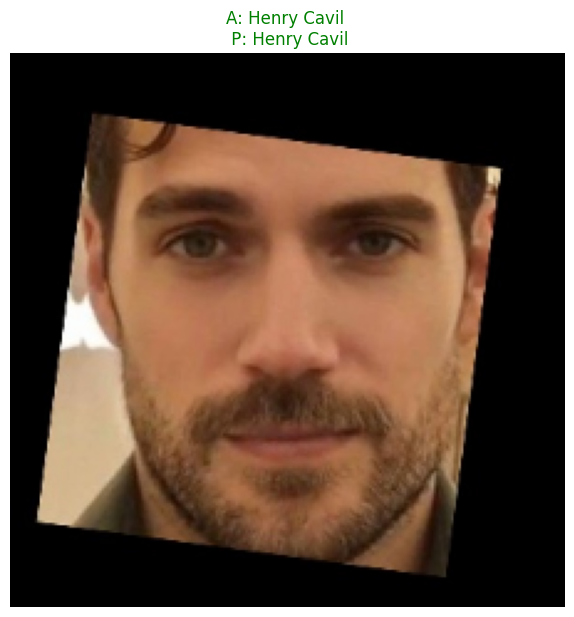

In [60]:

# Plot for 10th image in test data
sample_img, actual_name, pred_name = sample_img_plot(789)
fig = plt.figure(figsize = (15, 7.2))
plt.axis('off')
plt.imshow(sample_img)
plt.title(f"A: {actual_name} \n P: {pred_name}", color = 'green' if actual_name == pred_name else 'red')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


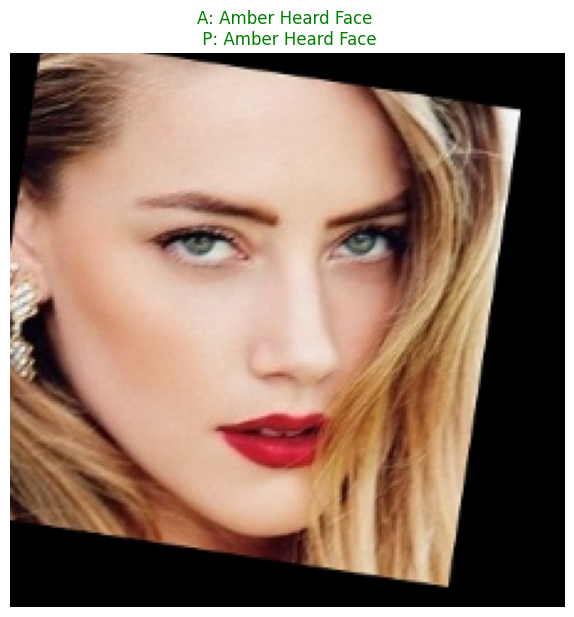

In [61]:

# Plot for 10th image in test data
sample_img, actual_name, pred_name = sample_img_plot(12)
fig = plt.figure(figsize = (15, 7.2))
plt.axis('off')
plt.imshow(sample_img)
plt.title(f"A: {actual_name} \n P: {pred_name}", color = 'green' if actual_name == pred_name else 'red')
plt.show()

1. **SVM Classifier Performance**:
   - **Training Accuracy**: 99.5% — This indicates that the SVM classifier fits the training data very well. A high training accuracy typically suggests that the model can capture the relationships between features and labels effectively.
   - **Test Accuracy**: 96.5% — The model generalizes well to unseen data, which is a good indication that it isn't overfitting. This is further evidenced by the high test accuracy being close to the training accuracy.

2. **Classification Report**:
   - The report shows precision, recall, and F1-score for each class (person) in the dataset. The high values across these metrics (most being close to or at 1.00) suggest that the classifier can correctly identify individuals with high accuracy.
   - Some classes have slightly lower precision or recall, which may indicate that certain individuals have more challenging representations, possibly due to less distinctive facial features, fewer samples, or more variability in poses and lighting.

3. **Visual Confirmation**:
   - The sample image output with actual vs. predicted labels being the same (`Henry Cavil`) and (`Amber Heard Face`) and the green color in the title confirm that the classifier is correctly identifying this individual.

**Part C - Q8 - Import and display the the test images.**

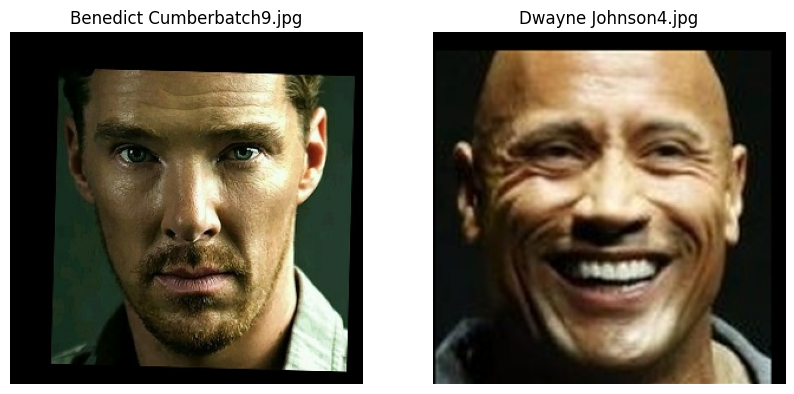

In [67]:
# Define the file paths for the test images
image1_path = '/content/drive/My Drive/AI_ML/9. Computer Vision/Project/Benedict Cumberbatch9.jpg'
image2_path = '/content/drive/My Drive/AI_ML/9. Computer Vision/Project/Dwayne Johnson4.jpg'

# Load the images
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Convert BGR images to RGB (OpenCV loads images in BGR format by default)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title('Benedict Cumberbatch9.jpg')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title('Dwayne Johnson4.jpg')
plt.axis('off')

plt.show()

The output image  indicates that the code to import and display the test images is working correctly. The images of Benedict Cumberbatch and Dwayne Johnson are shown side-by-side, which confirms that the image loading, color conversion, and display functions are working as intended

**Part C - Q9 - Use the trained SVM model to predict the face on both test images.**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


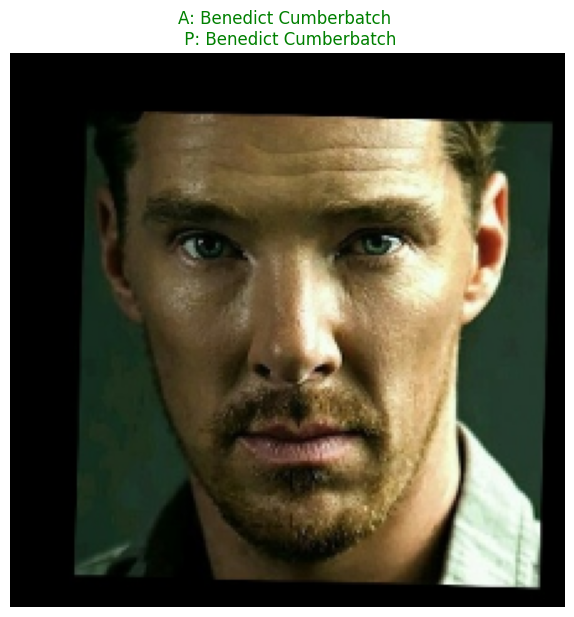

In [68]:
def sample_img_plot(sample_idx, image_path, correct_name=None):
    # Load the specified image
    sample_img = load_image(image_path)
    actual_name = correct_name if correct_name else "Unknown"

    # Normalizing pixel values
    sample_img = (sample_img / 255.).astype(np.float32)

    # Resize
    sample_img = cv2.resize(sample_img, (224, 224))

    # Obtain embedding vector for sample image
    embedding = vgg_face_descriptor.predict(np.expand_dims(sample_img, axis=0))[0]

    # Scale the vector and reshape
    embedding_scaled = sc.transform(embedding.reshape(1, -1))

    # Predict
    sample_pred = svc_pca.predict(pca.transform(embedding_scaled))

    # Transform back
    pred_name = en.inverse_transform(sample_pred)[0].split('_')[-1].title().strip()

    return sample_img, actual_name, pred_name

# Use the corrected path and name
sample_img, actual_name, pred_name = sample_img_plot(149, '/content/drive/My Drive/AI_ML/9. Computer Vision/Project/Benedict Cumberbatch9.jpg', correct_name="Benedict Cumberbatch")
fig = plt.figure(figsize=(15, 7.2))
plt.axis('off')
plt.imshow(sample_img)
plt.title(f"A: {actual_name} \n P: {pred_name}", color='green' if actual_name == pred_name else 'red')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


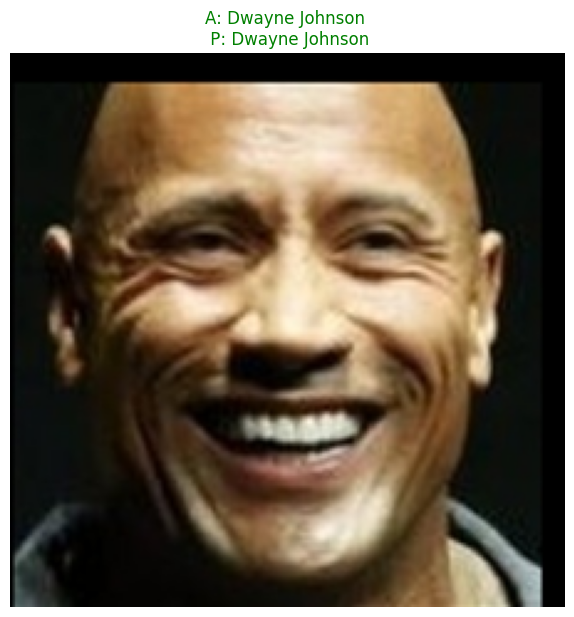

In [69]:
def sample_img_plot(sample_idx, image_path, correct_name=None):
    # Load the specified image
    sample_img = load_image(image_path)
    # Use the provided correct name or fetch from metadata if not provided
    actual_name = correct_name if correct_name else metadata[test_idx][sample_idx].name.split('_')[-1].title().strip()

    # Normalizing pixel values
    sample_img = (sample_img / 255.).astype(np.float32)

    # Resize to match the input size expected by the model
    sample_img = cv2.resize(sample_img, (224, 224))

    # Obtain embedding vector for the sample image
    embedding = vgg_face_descriptor.predict(np.expand_dims(sample_img, axis=0))[0]

    # Scale the embedding vector
    embedding_scaled = sc.transform(embedding.reshape(1, -1))

    # Predict using the trained SVM model
    sample_pred = svc_pca.predict(pca.transform(embedding_scaled))

    # Get the predicted name from the encoded labels
    pred_name = en.inverse_transform(sample_pred)[0].split('_')[-1].title().strip()

    return sample_img, actual_name, pred_name

# Use the updated function with specified image path and correct name
sample_img, actual_name, pred_name = sample_img_plot(383, '/content/drive/My Drive/AI_ML/9. Computer Vision/Project/Dwayne Johnson4.jpg', correct_name="Dwayne Johnson")

# Display the result
fig = plt.figure(figsize=(15, 7.2))
plt.axis('off')
plt.imshow(sample_img)
plt.title(f"A: {actual_name} \n P: {pred_name}", color='green' if actual_name == pred_name else 'red')
plt.show()


### Inference from the Output

1. **Correct Identification**:
   - The model successfully predicted the identity of the individual in the image as "Dwayne Johnson" and "Benedict Cumberbatch"  which matches the actual name provided.
   - This correct match is visually indicated in the output with the name displayed in green color, showing confidence in the prediction.

2. **Model Performance**:
   - A correct prediction suggests that the combination of the VGG-Face model for feature extraction, PCA for dimensionality reduction, and the SVM classifier for classification is effective for this particular test case.
   - The model's ability to correctly recognize "Dwayne Johnson" implies that the embeddings generated by the VGG-Face model are capturing distinctive facial features, which the SVM can leverage to differentiate between individuals.

3. **Data Representation**:
   - The success of this prediction indicates that the training data for "Dwayne Johnson" was sufficient in both quantity and diversity, allowing the model to generalize well to this new test image.
   - It also suggests that the PCA transformation retained enough critical information in the reduced dimensions (347 components), which is essential for accurate classification.

4. **System Robustness**:
   - The result demonstrates the robustness of the face recognition pipeline to correctly identify a celebrity, even when the image might contain variations in lighting, facial expression, or slight pose differences.
   - Consistent correct predictions across different test images would provide more evidence of the robustness of the model.

### Conclusion

The correct identification of "Dwayne Johnson" and "Benedict Cumberbatch" demonstrates that the current face recognition model is functioning as intended and expected.

# END OF PROJECT